In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("HW_4_pinball.ipynb")

# HWK 4 pinball simulation

The full pinball simulation: slides https://docs.google.com/presentation/d/1fNTOc_4YXfBkQ_ko9X8eQqAgK3Opnn9c02i72sVDqKU/edit?usp=sharing

Full pinball 
 - position and velocity with Euler simulation (lecture activity, compute_next_step)
 - stop when ball passes below y=0 (lab, simulate_pinball version 1)
 - "Bouncing" off of the top and side walls (lab, outside_xx_wall, handle bounce, simulate_pinball version 1)
 - "Bouncing" off of bumpers (homework)

Week 1: 
- Circular "bumpers" OR a wall at an angle (circular bumpers add extra credit)
- [optional] Some bumpers will impart an acceleration to the pinball
- [optional] Add damping

Week 2: Some simple calculations
- Length of path pinball travels
- Integral of vx and vy


In [2]:
# The usual imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

<!-- BEGIN QUESTION -->

## Circular bumper or angled wall: How to implement?

TODO: Write code to handle a circular bumper OR an angled wall

- decide which functions/what the format of the functions should be written to handle a bumper or angled wall
- decide how you will represent a bumper or an angled wall

Note: You'll add tests and simulation and plotting in the following questions

This is a manually graded question

**TODO:** 

Use this cell to describe how you are implementing your bumper or angled wall routines
- How are you representing the bumper/angled wall?
- What functions are you creating and why? What are the function inputs and outputs?


In [4]:
# Imports from week 5
# This bit of code tells Jupyter notebooks to also look in the week_6_optimization folder for files
import os
import sys

# If you want them...
sys.path.insert(0, os.path.abspath('../Week_5_matrices'))

SyntaxError: incomplete input (2763576422.py, line 6)

In [85]:
# TODO: Write additional routines here
# You can write them here or put them in pinball_routines.py and import them here
# Add one cell for each function

def place_bumpers(a, b, r):
    
    # The function takes in a and b as the x and y center of the bumper and r as the radius of the bumper
    # Using basic cartesian coordinates, The function returns the x and y coordinates of the bumper edges
    # While I am sure python can handle polar coords, I am not sure how to do it. I will stick to cartesian for now.

    # The bumpers are intended to be symetric about the y-axis. I am not usre if I will tackle that here or later.

    # Check if the radius of the bumper is too large... this could cause probelems given the symetry.
    if r > a or r > b:
        raise ValueError("The radius of the bumper is too large")
    
    xs_rads = np.linspace(a,a+r,10)
    xs_pos = xs_rads
    xs_neg = a-(xs_rads[1::1]-a)
    xs_neg = xs_neg[::-1]
    xs = np.concatenate((xs_neg,xs_pos)) 
    print(xs)
   
    ys_squared= r**2 - (xs-a)**2
    print(ys_squared)
    ys_top = np.abs(np.sqrt(ys_squared)+b)
    ys_top = ys_top[0:10]
    print(ys_top)
    ys_bottom = b-(ys_top[1::1]-b)
    ys_top = ys_top[::-1]
    ys = np.concatenate((ys_bottom,ys_top))
    print("ys")
    print(ys)
    bumper_edges = [xs,ys]
    print(bumper_edges)
    ret_bumper_edges = np.array(bumper_edges)
    return ret_bumper_edges


In [ ]:
-a)**2
    print(ys_squared)
    ys_top = np.sqrt(ys_squared)+b
    print(ys_top)
    ys_neg = -1*ys_pos
    ys = np.concatenate((ys_neg,ys_top))
    print(ys)
    bumper_edges = [xs,ys+b]
    print(bumper_edges)
    ret_bumper_edges = np.array(bumper_edges)
    return ret_bumper_edges


In [ ]:
def bumpers_colided (ball_loc, bumper_edges):
    # This function takes in the location of the ball and the edges of the bumpers
    # It returns a boolean array that is true if the ball has colided with the bumper
    # The ball_loc is a 2x1 array and the bumper_edges is a 2xN array
    # The function will return a 1xN array of booleans
    
   

In [77]:
def plot_bumpers(bumper_edges,axes):
    # This function takes in the edges of the bumpers and plots them
    # The function returns nothing

    # I am not sure if I should plot the bumpers as a line or as a filled circle. I will start with a line
    xs = bumper_edges[0]
    ys
    axes.plot(bumper_edges[0],bumper_edges[1])
    plt.show() 

[1.5        1.55555556 1.61111111 1.66666667 1.72222222 1.77777778
 1.83333333 1.88888889 1.94444444 2.         2.05555556 2.11111111
 2.16666667 2.22222222 2.27777778 2.33333333 2.38888889 2.44444444
 2.5       ]
[0.         0.05246914 0.09876543 0.13888889 0.17283951 0.20061728
 0.22222222 0.23765432 0.24691358 0.25       0.24691358 0.23765432
 0.22222222 0.20061728 0.17283951 0.13888889 0.09876543 0.05246914
 0.        ]
[2.         2.22906142 2.31426968 2.372678   2.41573971 2.44790321
 2.47140452 2.48749802 2.49690399 2.5       ]
ys
[1.77093858 1.68573032 1.627322   1.58426029 1.55209679 1.52859548
 1.51250198 1.50309601 1.5        2.5        2.49690399 2.48749802
 2.47140452 2.44790321 2.41573971 2.372678   2.31426968 2.22906142
 2.        ]
[array([1.5       , 1.55555556, 1.61111111, 1.66666667, 1.72222222,
       1.77777778, 1.83333333, 1.88888889, 1.94444444, 2.        ,
       2.05555556, 2.11111111, 2.16666667, 2.22222222, 2.27777778,
       2.33333333, 2.38888889, 2.4444444

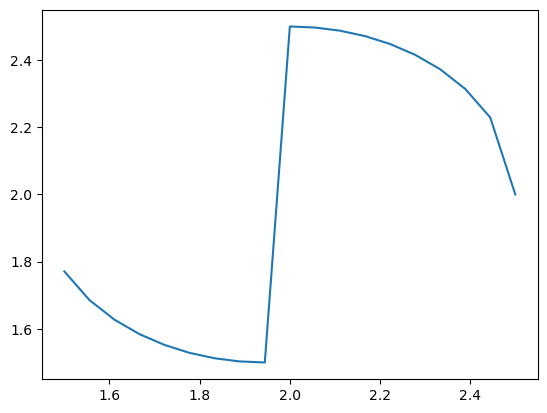

In [86]:
bumper_edges = place_bumpers(2,2,.5)
print(bumper_edges)
fig, ax = plt.subplots()
plot_bumpers(bumper_edges,ax)

In [ ]:
# TODO: Add tests here to test your functions
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Simulation routine

TODO: Copy over the simulation routine from your lab

- Change the function's parameters so that they take in the bumpers/angled wall as well
- Optional: If you implement acceleration or drag then describe it here 

This question is manually graded. Describe what you did, why, and how

TODO: Describe your solution here

In [88]:
# Pinball_routines imports
from pinball_routines import 
import pinball_walls as pw


ModuleNotFoundError: No module named 'pinball_walls'

In [ ]:
# Simulate pinball routine
#. TODO Copy your lab solution here
#       Change the parameters to support your circular bumpers or angled wall
...

In [89]:
# Time step
delta_t = 0.01

# Test 1 - do you stop when you hit the floor?
starting_state = np.zeros([3, 2])  # location, velocity, acceleration
starting_state[0, :] = [0, 0] # Start at zero, zero
starting_state[1, :] = [2.4, 8.5]
starting_state[2, :] = [0.0, acceleration_due_to_gravity()]

# Define your bumper/angled wall here
# Default is top wall at y=5, left/right walls at +- 3.0
...

NameError: name 'acceleration_due_to_gravity' is not defined

In [ ]:
# Test the simulate_pinball function, with at least setup
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Plot bumpers or angled wall, walls, and path

TODO: Start with the plotting code from the lab
 - add plotting the bumpers or angled wall
 - pass the data structure you use to define the bumpers and walls to the plot routine
 
TODO: Generate at least 2 plots showing the pinball doing different behaviors (must include reflection off of wall, bumper[s]/angled wall)

This question is manually graded

In [ ]:
# TODO: Create a function to plot the pinball track, walls, and bumpers
#  Start with the lab plot
...

In [ ]:
# TODO: set up different starting positions and/or pinball setups and plot them
...

In [ ]:
# Manual grade
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")

<!-- END QUESTION -->

## Week 2 - Use integration to calculate length of path

TODO: Calculate the length of the pinball path using euclidian distances

In [ ]:
def length_of_pinball_path(poses):
    """ Calculate the length of the pinball path using euclidian distances
    @param poses - the x,y poses
    @return length"""
    # TODO: Sum up the distance between all of the pose points
    # Reminder: Distance is sqrt(x^2 + y^2)
    return 0.0
    # END PROMPT """

In [ ]:
# TODO For these tests use this starting state
#  - do NOT place a bumper/wall in the path - it should just go up and down
#  - Use the given starting position and velocity
#  - Use a delta t of 0.01
#  - Do NOT do damping
starting_state = np.zeros([3, 2])  # location, velocity, acceleration
starting_state[0, :] = [0, 0] # Start at zero, zero
# Velocity - mostly up with a bit of x noise
starting_state[1, :] = [0.5, 3.5]
starting_state[2, :] = [0.0, acceleration_due_to_gravity()]

# TODO: call your simulate routine with  delta_t = 0.01 and the above starting state

ret_poses = ...
# END PROMPT """


In [ ]:
# poses check - 
len_path = (length_of_pinball_path(ret_poses))
print(f"Distance traveled {len_path}, expected 1.386298")

In [ ]:
grader.check("integrate_path")

## Integrate x velocity and y velocity

TODO: Calculate the total relative distance the pinball traveled in x and y by integrating the velocity in x and y
- TODO: Change your simulation code so it returns velocities in addition to poses
- Call trapz with the vx values, using a fixed dx (delta_t) (this is the integral)

In [ ]:
# EXAMPLE CODE
# To return the velocities in addition to the poses you want to
#   1) replicate your code for storing the positions, only this time, store the velocities
#   2) return the velocities as well as the positions
#   3) extract the velocities out

# There's two ways to do this, either as a 4xn array (get the velocities out afterwards, or two 2xn arrays)
n = 10
ret_vals = np.zeros((4, n))  # storing x, y, vx, vy in each column
x = 0
y = 0
vx = 0.1
vy = 0.2
state = np.zeros((2, 2))
state[0, :] = [x, y]    # First row is position
state[1, :] = [vx, vy]  # Second row is velocity
for i in range(0, n):
    ret_vals[0:2, i] = state[0, :]   # put the current state position in the first two rows
    ret_vals[2:4, i] = state[1, :]   # put the current state position in the 3rd and fourth rows

    # Increment state
    state[0, :] = state[0, :] + state[1, :] * 0.1
# return ret_vals
    
# Calling function
poses = ret_vals[0:2, :]
vels = ret_vals[2:4, :]

# OR
ret_poses = np.zeros((2, n))  # storing x, y in each column
ret_vels = np.zeros((2, n))  # storing vx, vy in each column
x = 0
y = 0
vx = 0.1
vy = 0.2
state = np.zeros((2, 2))
state[0, :] = [x, y]    # First row is position
state[1, :] = [vx, vy]  # Second row is velocity
for i in range(0, n):
    ret_poses[0:2, i] = state[0, :]   # put the current state position in the first two rows
    ret_vels[0:2, i] = state[1, :]   # put the current state position in the 3rd and fourth rows

    # Increment state
    state[0, :] = state[0, :] + state[1, :] * 0.1

# return ret_poses, ret_vels
# poses, vels = func()


In [ ]:
def integral_of_path_velocity(velocities, delta_t):
    """ Calculate the x and y distance traveled of the pinball path by integrating the velocities
    @param velocities - the vx,vy velocities at each time step
    @param delta_t - the sampling used to generate the velocities
    @return integral of vx, integral of vy"""
    # TODO: Calculate the integral of vx and vy
    # Note: You'll want trapz because these are samples of the velocity function
    return integral_x, integral_y
    # END PROMPT """

In [ ]:
# This needs to be a 2xn array of the velocities at each time step
ret_velocities = ...
# END PROMPT """

# Note - make sure you're using the starting state given in the path integration
integral_x, integral_y = integral_of_path_velocity(ret_velocities, delta_t)
print(f"Integral of x velocity {integral_x}, expected 0.365")
print(f"Integral of y velocity {integral_y}, expected -0.056209")

In [ ]:
grader.check("integrate_velocity")

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [ ]:

# List of names (creates a set)
worked_with_names = {"not filled out"}
# List of URLS TCW3 (creates a set)
websites = {"not filled out"}
# Approximate number of hours, including lab/in-class time
hours = -1.5

In [ ]:
grader.check("hours_collaborators")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, homework 4 pinball. Don't forget pinball_routines.py

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)